In [1]:
from rateslib import *

In [36]:
usdrfr = Curve({dt(2022, 1, 1): 1.0, dt(2027, 1, 1): 1.0, dt(2032, 1, 1): 1.0}, id="usdrfr")
usdusd = Curve({dt(2022, 1, 1): 1.0, dt(2027, 1, 1): 1.0, dt(2032, 1, 1): 1.0}, id="usdusd")
eurrfr = Curve({dt(2022, 1, 1): 1.0, dt(2027, 1, 1): 1.0, dt(2032, 1, 1): 1.0}, id="eurrfr")
eureur = Curve({dt(2022, 1, 1): 1.0, dt(2027, 1, 1): 1.0, dt(2032, 1, 1): 1.0}, id="eureur")
eurusd = Curve({dt(2022, 1, 1): 1.0, dt(2027, 1, 1): 1.0, dt(2032, 1, 1): 1.0}, id="eurusd")
eur_eurusd = CompositeCurve([eureur, eurusd], multi_csa=True, id="eur_eurusd")

instruments = [
    IRS(dt(2022, 1, 1), "5Y", "A", currency="eur", curves=["eurrfr", "eureur"]),
    IRS(dt(2022, 1, 1), "10Y", "A", currency="eur", curves=["eurrfr", "eureur"]),
    SBS(dt(2022, 1, 1), "5Y", "A", currency="eur", curves=["eureur", "eureur", "eurrfr", "eureur"]),
    SBS(dt(2022, 1, 1), "10Y", "A", currency="eur", curves=["eureur", "eureur", "eurrfr", "eureur"]),
    IRS(dt(2022, 1, 1), "5Y", "A", currency="usd", curves=["usdrfr", "usdusd"]),
    IRS(dt(2022, 1, 1), "10Y", "A", currency="usd", curves=["usdrfr", "usdusd"]),
    SBS(dt(2022, 1, 1), "5Y", "A", currency="usd", curves=["usdusd", "usdusd", "usdrfr", "usdusd"]),
    SBS(dt(2022, 1, 1), "10Y", "A", currency="usd", curves=["usdusd", "usdusd", "usdrfr", "usdusd"]),
    XCS(dt(2022, 1, 1), "5Y", "A", currency="eur", leg2_currency="usd", curves=["eurrfr", "eurusd", "usdrfr", "usdusd"]),
    XCS(dt(2022, 1, 1), "10Y", "A", currency="eur", leg2_currency="usd", curves=["eurrfr", "eurusd", "usdrfr", "usdusd"]),
]
fxf = FXForwards(
    fx_rates=FXRates({"eurusd": 1.20}, settlement=dt(2022, 1, 3)),
    fx_curves={
        "usdusd": usdusd,
        "eureur": eureur,
        "eurusd": eurusd,
    }
)
solver = Solver(
    curves=[usdrfr, usdusd, eurrfr, eureur, eurusd, eur_eurusd],
    instruments=instruments,
    fx=fxf,
    s=[1.25, 1.35, 0.0, 0.0, 3.35, 3.10, 3.35, 3.10, -12.0, -2.0],
    instrument_labels=[
        "EUR 5Y dP/dr", "EUR 10Y dP/dr", "EUR 5Y dP/ds", "EUR 10Y dP/ds",
        "USD 5Y dP/dr", "USD 10Y dP/dr", "USD 5Y dP/ds", "USD 10Y dP/ds",
        "XCS 5Y", "XCS 10Y",
    ]
)



SUCCESS: `func_tol` reached after 4 iterations (gauss_newton) , `f_val`: 9.625017277816567e-20, `time`: 0.3125s


In [37]:
irs = IRS(dt(2022, 1, 1), "10Y", "A", curves=["eurrfr", "eur_eurusd"], notional=-100e6, fixed_rate=2.0, currency="eur")
irs.delta(solver=solver).style.format(precision=0)

In [28]:
irs.npv(solver=solver)

<Dual: 5,449,970.676826, ('eureur0', 'eureur1', 'eurrfr0', 'eurrfr1', 'eurrfr2', 'eurusd0', 'eurusd1', 'eurusd2', 'fx_eurusd', 'usdusd0', 'usdusd1'), [-4.09293438e+06  4.35910307e+06 -1.07258873e+08  7.53711370e+06
  1.14819580e+08 -5.44400138e+06 -1.32302526e+06  1.41970668e+06
  4.95451880e+06  5.44400138e+06  7.04333642e+03]>

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: >,
  <matplotlib.lines.Line2D at 0x120ced390>])

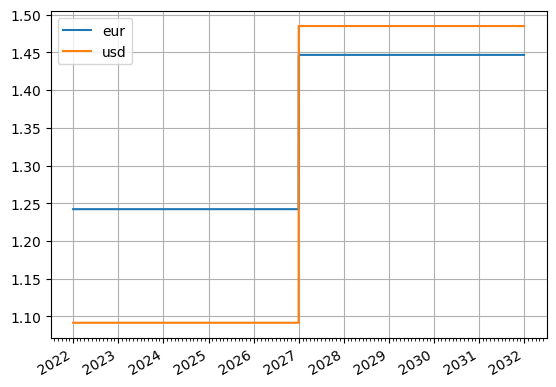

In [24]:
eureur.plot("1d", comparators=[eurusd], labels=["eur", "usd"])